<a href="https://colab.research.google.com/github/jainrasik/Customer-Segmentation-Rasik-Jain/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Customer Segmentation for a UK-based and registered non-store online. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Customer Segmentation-Rasik Jain/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df=df[~df['CustomerID'].isnull()]
df.shape

(406829, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df=df[~df.duplicated()]
df.shape

(401604, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df=df[~df.Quantity<0]

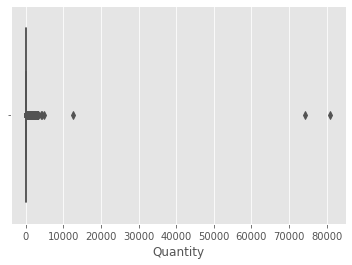

In [ ]:
sns.boxplot(data=df,x='Quantity')

In [ ]:
df.StockCode.value_counts()

85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
          ... 
90025F       1
35610B       1
16161M       1
22275        1
90122B       1
Name: StockCode, Length: 3665, dtype: int64

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df['revenue']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


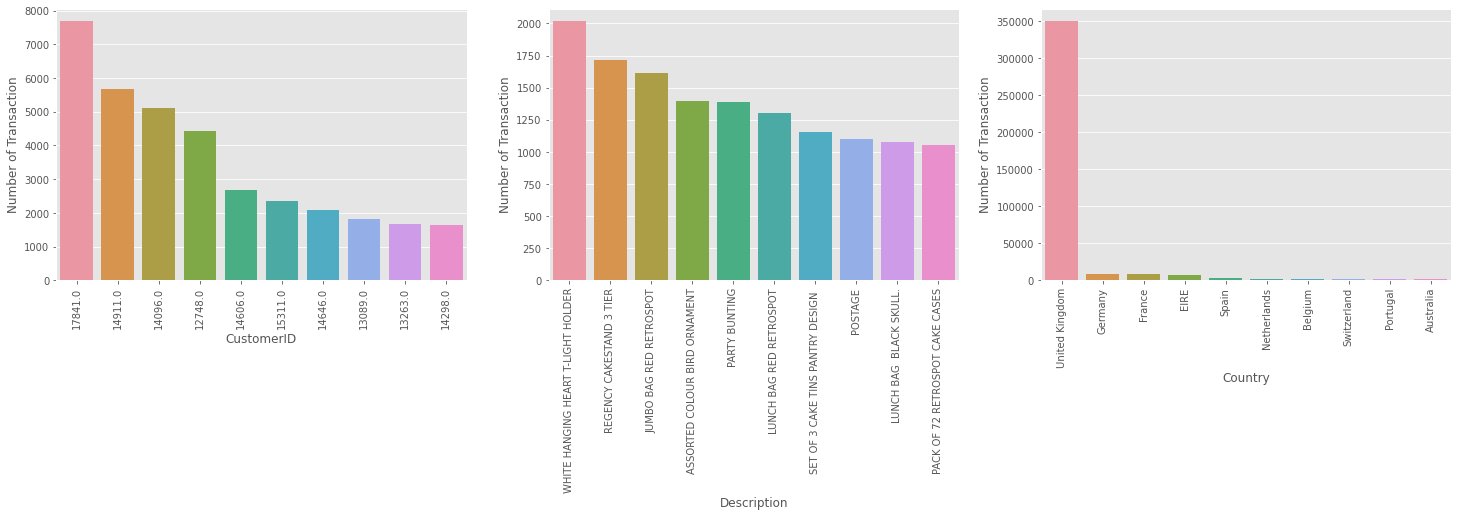

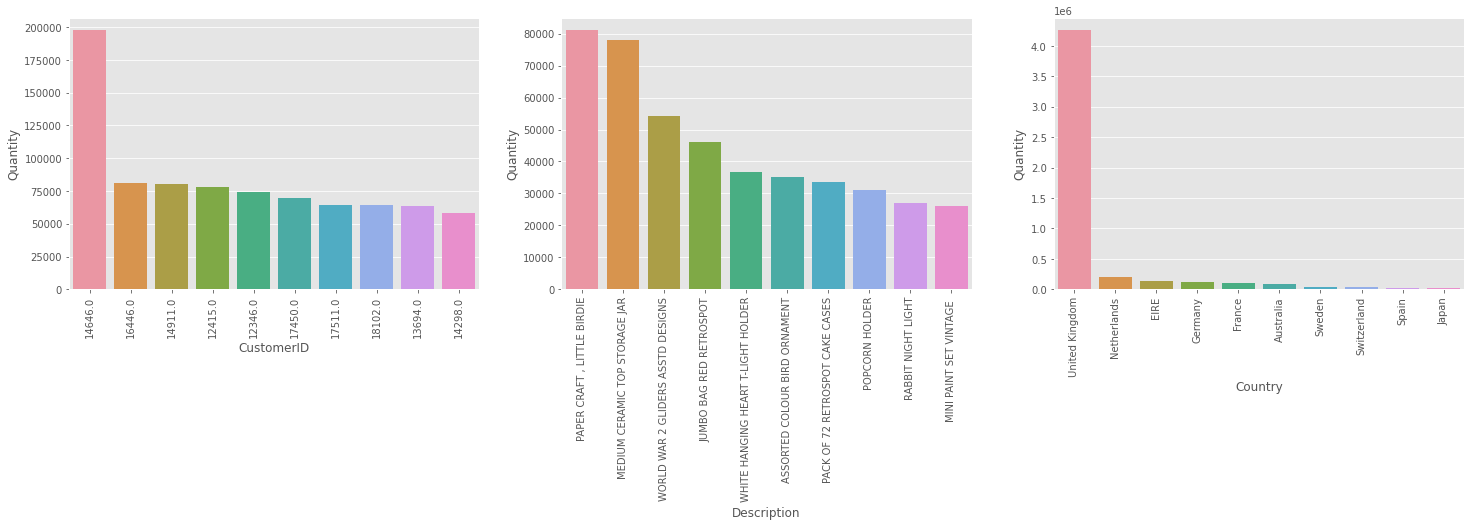

<Figure size 1800x360 with 0 Axes>

<Figure size 1800x360 with 0 Axes>

In [ ]:
Categorical_Variable=['CustomerID','Description','Country']
plt.figure(figsize=[25,5])
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending=False).head(10).rename({'InvoiceNo':'Number of Transaction'},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y='Number of Transaction',order=data.sort_values(by='Number of Transaction',ascending=False)[col])
  plt.xticks(rotation=90)
plt.show()
value='Quantity'
plt.figure(figsize=[25,5])
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)[value].sum().reset_index().sort_values(by=value,ascending=False).head(10).rename({value:value},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y=value,order=data.sort_values(by=value,ascending=False)[col])
  plt.xticks(rotation=90)
plt.show()
value='UnitPrice'
plt.figure(figsize=[25,5])


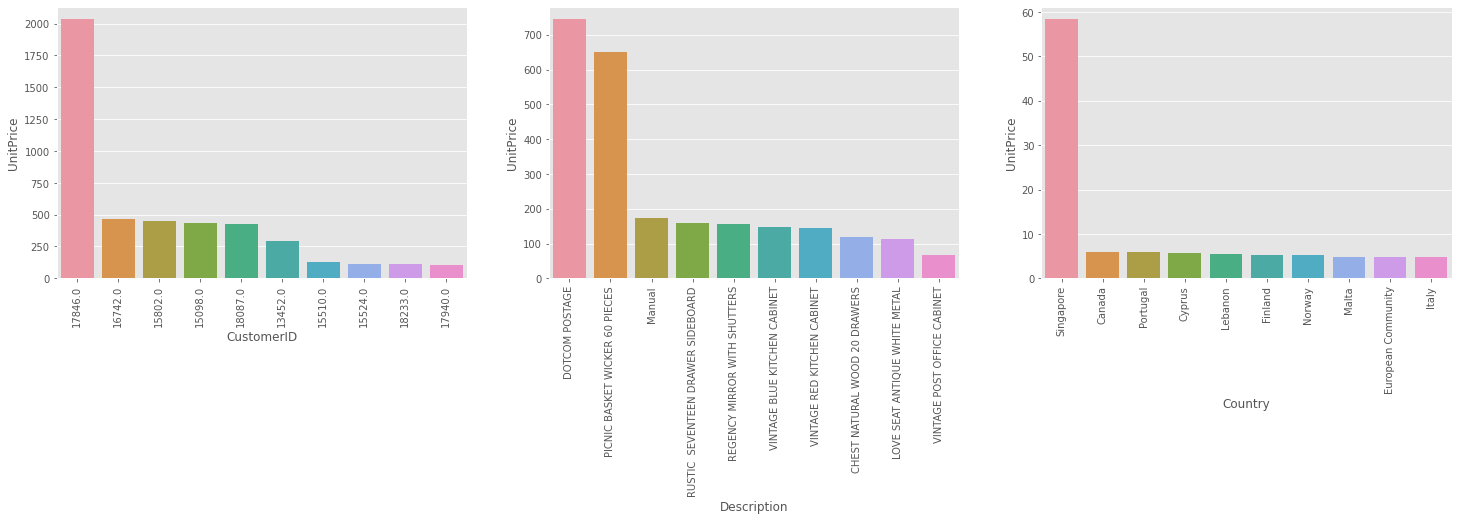

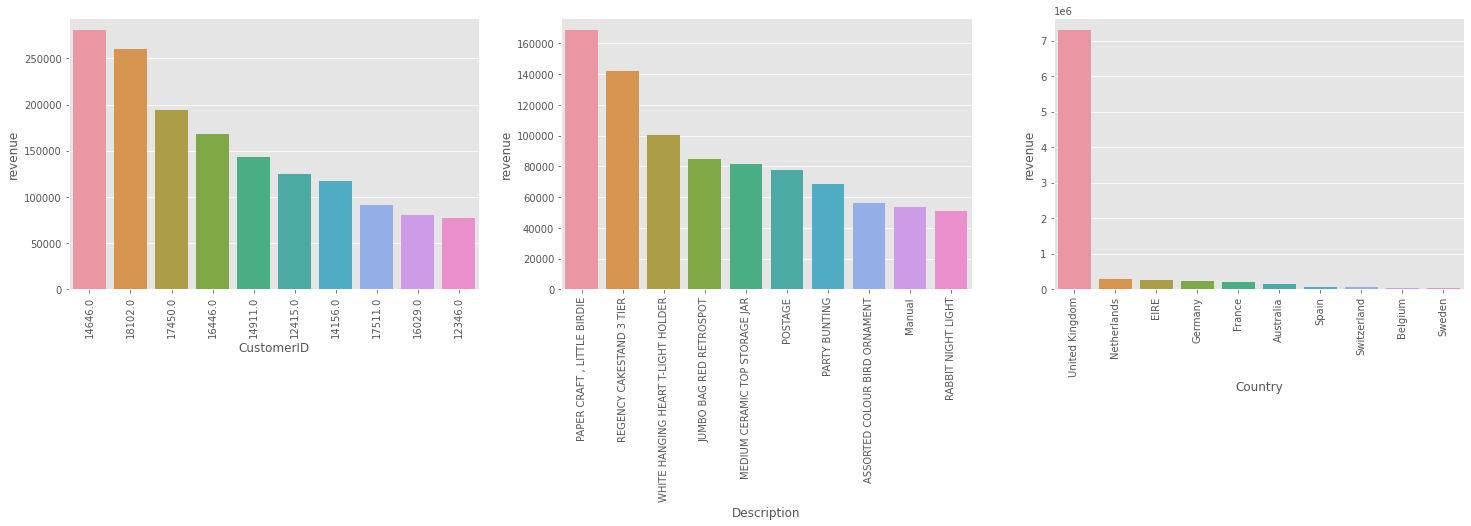

In [ ]:
plt.figure(figsize=[25,5])
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)[value].mean().reset_index().sort_values(by=value,ascending=False).head(10).rename({value:value},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y=value,order=data.sort_values(by=value,ascending=False)[col])
  plt.xticks(rotation=90)
plt.show()
value='revenue'
plt.figure(figsize=[25,5])
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)[value].sum().reset_index().sort_values(by=value,ascending=False).head(10).rename({value:value},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y=value,order=data.sort_values(by=value,ascending=False)[col])
  plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'revenue'],
      dtype='object')

In [ ]:
df.InvoiceDate.dt.day_name().value_counts()

Thursday     79260
Wednesday    68043
Tuesday      65747
Monday       64237
Sunday       61214
Friday       54231
Name: InvoiceDate, dtype: int64

In [ ]:
df.InvoiceDate.dt.month_name().value_counts()

November     63182
October      48796
December     42699
September    39671
May          28075
June         26926
March        26872
August       26796
July         26582
April        22435
January      20991
February     19707
Name: InvoiceDate, dtype: int64

In [ ]:
Frq_df=pd.DataFrame()

In [ ]:
Frq_df['Frequencycount']=df.groupby('CustomerID')['InvoiceNo'].count()

In [ ]:
Frq_df

,Frequencycount
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


In [ ]:
amt_df=pd.DataFrame()

In [ ]:
amt_df=df.groupby('CustomerID')['revenue'].sum()

In [ ]:
amt_df

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: revenue, Length: 4339, dtype: float64

In [ ]:
ddd=pd.merge(Frq_df,amt_df,on='CustomerID',how='inner')

In [ ]:
ddd

,Frequencycount,revenue
CustomerID,,
12346.0,1,77183.60
12347.0,182,4310.00
12348.0,31,1797.24
12349.0,73,1757.55
12350.0,17,334.40
...,...,...
18280.0,10,180.60
18281.0,7,80.82
18282.0,12,178.05


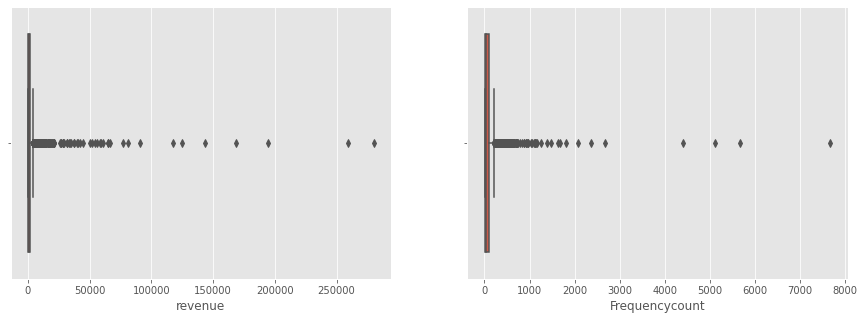

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data=ddd,x='revenue')
plt.subplot(1,2,2)
sns.boxplot(data=ddd,x='Frequencycount')
plt.show()

In [ ]:
IQR=ddd.revenue.quantile(0.75)-ddd.revenue.quantile(0.25)
ul=ddd.revenue.quantile(0.75)+1.5*IQR
ll=ddd.revenue.quantile(0.25)-1.5*IQR
print(ul,ll)
ddd=ddd[(ddd['revenue']>ll)&(ddd['revenue']<ul)]

3691.1050000000023 -1724.3350000000014


In [ ]:
IQR=ddd.Frequencycount.quantile(0.75)-ddd.Frequencycount.quantile(0.25)
ul=ddd.Frequencycount.quantile(0.75)+1.5*IQR
ll=ddd.Frequencycount.quantile(0.25)-1.5*IQR
print(ul,ll)
ddd=ddd[(ddd['Frequencycount']>ll)&(ddd['Frequencycount']<ul)]

172.5 -79.5


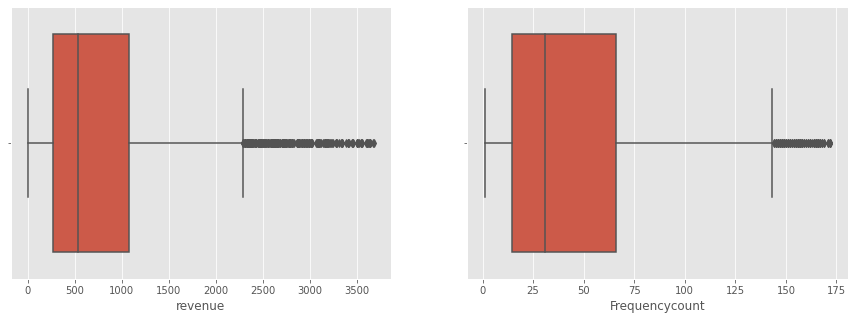

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data=ddd,x='revenue')
plt.subplot(1,2,2)
sns.boxplot(data=ddd,x='Frequencycount')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
ddd=scaler.fit_transform(ddd)
ddd=pd.DataFrame(ddd,columns=['Freq','amt'])
ddd

,Freq,amt
0,-0.362465,1.334463
1,0.681332,1.281539
2,-0.710398,-0.616146
3,0.979560,2.279606
4,-1.033478,-0.943372
...,...,...
3658,-0.909216,-0.830163
3659,-0.884364,-0.821229
3660,-0.958921,-0.954280
3661,-0.834659,-0.824629


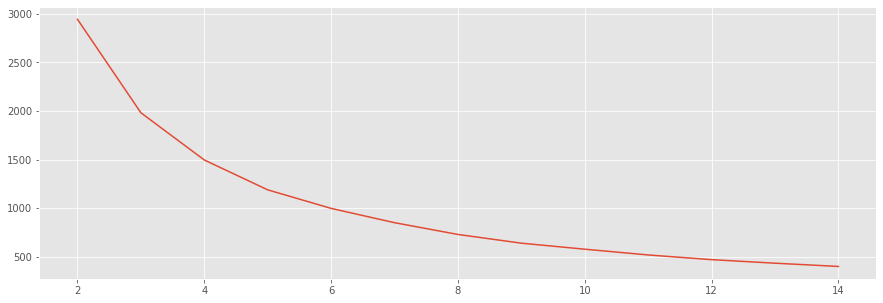

In [ ]:
plt.figure(figsize=[15,5])
wcss=[]
for k in range(2,15):
  kmean=KMeans(n_clusters=k)
  kmean.fit(ddd)
  wcss.append(kmean.inertia_)
sns.lineplot(x=range(2,15),y=wcss)
plt.show()

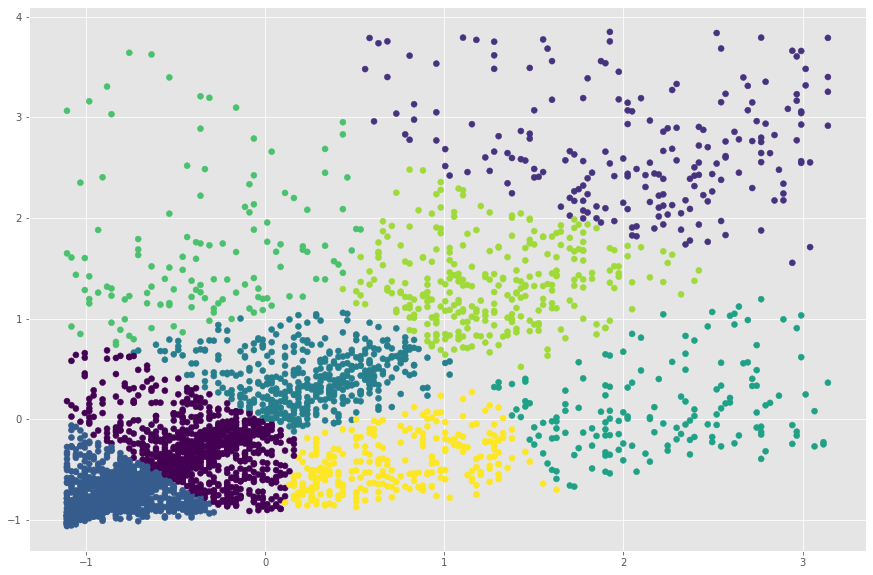

In [ ]:
plt.figure(figsize=[15,10])
kmean=KMeans(n_clusters=8)
kmean.fit(ddd)
ymean=kmean.predict(ddd)
plt.scatter(ddd['Freq'],ddd['amt'],c=ymean)
plt.show()